<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/ML_A_Z/regression/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls -ltr /content/drive/MyDrive/ML_A_Z/Part_3_Classification/Section_14_Logistic_Regression/Python/Social_Network_Ads.csv

-rw------- 1 root root 4903 May  3  2020 /content/drive/MyDrive/ML_A_Z/Part_3_Classification/Section_14_Logistic_Regression/Python/Social_Network_Ads.csv


In [5]:
path = '/content/drive/MyDrive/ML_A_Z/Part_3_Classification/Section_14_Logistic_Regression/Python/Social_Network_Ads.csv'

In [6]:
df = pd.read_csv(path)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
df.shape

(400, 3)

In [8]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<Axes: >

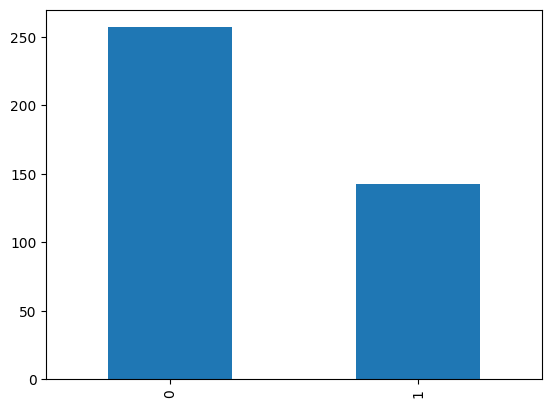

In [10]:
%matplotlib inline

df.Purchased.value_counts().plot(kind='bar')

In [11]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [12]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [13]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

In [16]:
X_train

array([[    21,  88000],
       [    43, 112000],
       [    29,  61000],
       [    34,  25000],
       [    20,  86000],
       [    60,  46000],
       [    35,  75000],
       [    24,  55000],
       [    31,  74000],
       [    46, 117000],
       [    47,  49000],
       [    36,  75000],
       [    32, 100000],
       [    35,  59000],
       [    58,  23000],
       [    29,  28000],
       [    35,  77000],
       [    35,  72000],
       [    48, 141000],
       [    28,  32000],
       [    25,  22000],
       [    21,  72000],
       [    27,  58000],
       [    41,  79000],
       [    50,  36000],
       [    48,  29000],
       [    31,  18000],
       [    28,  87000],
       [    54,  70000],
       [    28,  55000],
       [    30,  79000],
       [    54,  26000],
       [    24,  27000],
       [    29,  83000],
       [    39, 106000],
       [    49,  39000],
       [    35,  27000],
       [    30,  17000],
       [    32,  18000],
       [    35,  23000],


## Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [18]:
X_train_scaled

array([[-1.55823061e+00,  5.73372484e-01],
       [ 5.33779565e-01,  1.29801385e+00],
       [-7.97499635e-01, -2.41849057e-01],
       [-3.22042778e-01, -1.32881111e+00],
       [-1.65332198e+00,  5.12985703e-01],
       [ 2.15033288e+00, -6.94749913e-01],
       [-2.26951407e-01,  1.80858408e-01],
       [-1.27295649e+00, -4.23009399e-01],
       [-6.07316892e-01,  1.50665018e-01],
       [ 8.19053679e-01,  1.44898081e+00],
       [ 9.14145051e-01, -6.04169742e-01],
       [-1.31860035e-01,  1.80858408e-01],
       [-5.12225521e-01,  9.35693168e-01],
       [-2.26951407e-01, -3.02235838e-01],
       [ 1.96015014e+00, -1.38919789e+00],
       [-7.97499635e-01, -1.23823094e+00],
       [-2.26951407e-01,  2.41245189e-01],
       [-2.26951407e-01,  9.02782373e-02],
       [ 1.00923642e+00,  2.17362217e+00],
       [-8.92591007e-01, -1.11745738e+00],
       [-1.17786512e+00, -1.41939128e+00],
       [-1.55823061e+00,  9.02782373e-02],
       [-9.87682378e-01, -3.32429228e-01],
       [ 3.

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [20]:
y_pred = lr.predict(X_test_scaled)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0])

In [21]:
lr.predict(sc.transform([[30,87000]]))

array([0])

In [22]:
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

array([[1, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [0,

## Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[56,  7],
       [10, 27]])

In [24]:
lr.score(X_test_scaled,y_test)

0.83

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.83

## Visualization

<ipython-input-27-2e6cf0bda5ef>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


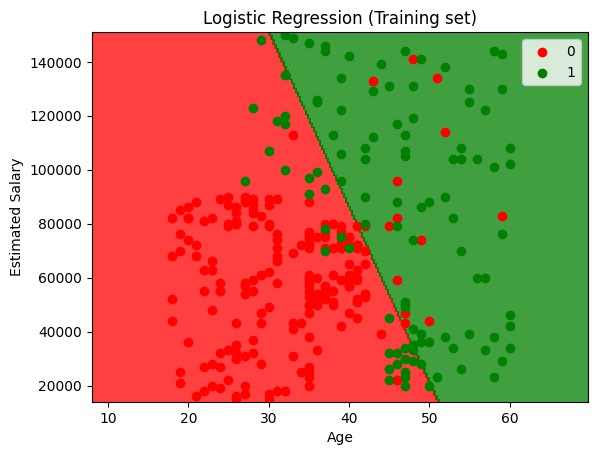

In [27]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train_scaled), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, lr.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-28-a9bf27035982>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


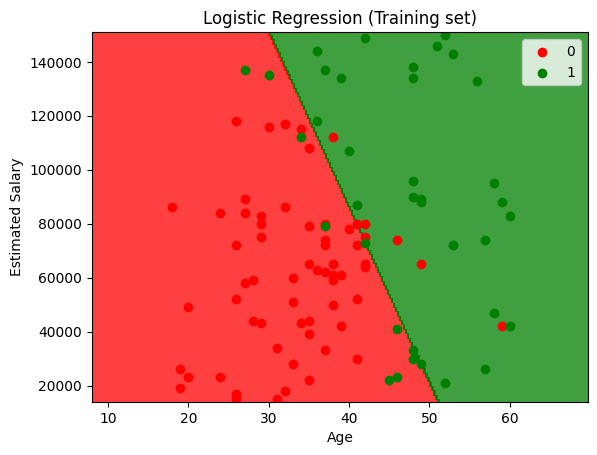

In [28]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test_scaled), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, lr.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Excercise for tumor dataset

In [30]:
!ls -ltr /content/drive/MyDrive/ML_A_Z/Part_3_Classification/Section_14_Logistic_Regression/Python/breast_cancer.csv

-rw------- 1 root root 19635 Feb 22  2018 /content/drive/MyDrive/ML_A_Z/Part_3_Classification/Section_14_Logistic_Regression/Python/breast_cancer.csv


In [31]:
tumor_df =pd.read_csv('/content/drive/MyDrive/ML_A_Z/Part_3_Classification/Section_14_Logistic_Regression/Python/breast_cancer.csv')
tumor_df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


<Axes: >

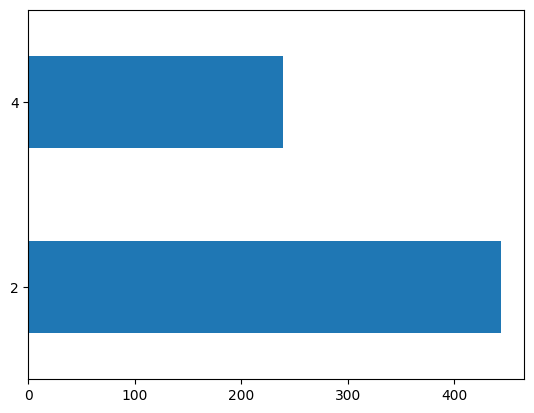

In [45]:
tumor_df.Class.value_counts().plot(kind='barh')

In [32]:
tumor_df.shape

(683, 11)

In [33]:
tumor_df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [34]:
X = tumor_df.iloc[:,1:-1].values
y = tumor_df.iloc[:,-1].values

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [36]:
X_train.shape

(546, 9)

In [37]:
X_test.shape

(137, 9)

In [38]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [39]:
classifier.score(X_test,y_test)

0.9854014598540146

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

array([[2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 2],
       [4, 4],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 2],
       [4,

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[88,  2],
       [ 0, 47]])

In [52]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(f'Accuracy : {accuracies.mean()*100}')
print(f'Accuracy STD DEV : {accuracies.std()*100}')

Accuracy : 96.15488215488215
Accuracy STD DEV : 2.2505993488032896
